In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from tqdm import tqdm

data = pd.read_csv('/kaggle/input/earthquake-time-vs-velocity-dataset/space_app_not_continuous.csv')

data

,data,p_wave_arrival,time
0,0.011564,300.0,0.00
1,0.012698,300.0,0.25
2,0.012159,300.0,0.50
3,0.013744,300.0,0.75
4,0.013187,300.0,1.00
...,...,...,...
59698396,0.005810,0.0,14924599.00
59698397,0.009254,0.0,14924599.25
59698398,0.005633,0.0,14924599.50
59698399,0.008816,0.0,14924599.75


In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [3]:
data = data[['p_wave_arrival','time','data']]
data

,p_wave_arrival,time,data
0,300.0,0.00,0.011564
1,300.0,0.25,0.012698
2,300.0,0.50,0.012159
3,300.0,0.75,0.013744
4,300.0,1.00,0.013187
...,...,...,...
59698396,0.0,14924599.00,0.005810
59698397,0.0,14924599.25,0.009254
59698398,0.0,14924599.50,0.005633
59698399,0.0,14924599.75,0.008816


In [4]:
idx = int(59698401/5)
idx

11939680

In [5]:
shifted_df = data[:idx]

In [6]:
shifted_df[-60000:]

,p_wave_arrival,time,data
11879680,2971066.75,2969920.00,0.418395
11879681,2971066.75,2969920.25,0.421770
11879682,2971066.75,2969920.50,0.420537
11879683,2971066.75,2969920.75,0.423720
11879684,2971066.75,2969921.00,0.422458
...,...,...,...
11939675,2985266.75,2984918.75,-0.060091
11939676,2985266.75,2984919.00,-0.059706
11939677,2985266.75,2984919.25,-0.060011
11939678,2985266.75,2984919.50,-0.059657


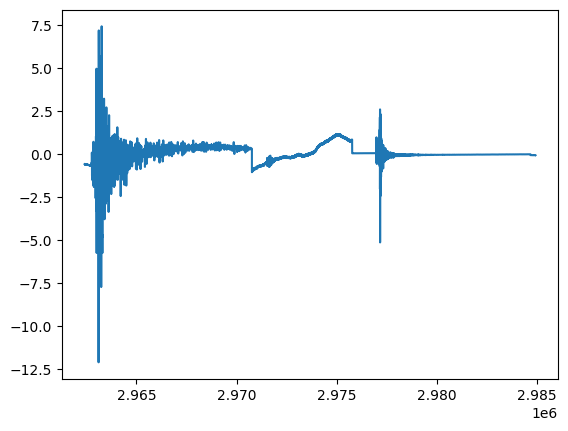

In [7]:
import matplotlib.pyplot as plt
plt.plot(shifted_df[-90000:].time,shifted_df[-90000:].data)

In [8]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[ 3.00000000e+02,  0.00000000e+00,  1.15641236e-02],
       [ 3.00000000e+02,  2.50000000e-01,  1.26982391e-02],
       [ 3.00000000e+02,  5.00000000e-01,  1.21591066e-02],
       ...,
       [ 2.98526675e+06,  2.98491925e+06, -6.00114964e-02],
       [ 2.98526675e+06,  2.98491950e+06, -5.96572625e-02],
       [ 2.98526675e+06,  2.98491975e+06, -6.00802073e-02]])

In [9]:
shifted_df_as_np.shape

(11939680, 3)

In [10]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))
# shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

# shifted_df_as_np

In [11]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((11939680, 2), (11939680,))

In [12]:
shifted_df.data.mean()

-0.0029941329537829693

In [13]:
prev = 5
nxt = 20
mul = 10
ln = len(X)
ls = []
for i in tqdm(range(len(X))):
    tem = []
    for j in range(1,prev+1):
        vl = i-mul*j
        if(vl>-1):
            tem.append(X[vl])
        else:
            tem.append([shifted_df.time.mean(),shifted_df.data.mean()])
    tem = tem[::-1]
    tem.append(X[i])
    for j in range(1,nxt+1):
        vl = i+mul*j
        if(vl<ln):
            tem.append(X[vl])
        else:
            tem.append([shifted_df.time.mean(),shifted_df.data.mean()])
    ls.append(np.array(tem))
ls[:2]

100%|██████████| 11939680/11939680 [09:00<00:00, 22102.16it/s]


[array([[ 1.49245988e+06, -2.99413295e-03],
        [ 1.49245988e+06, -2.99413295e-03],
        [ 1.49245988e+06, -2.99413295e-03],
        [ 1.49245988e+06, -2.99413295e-03],
        [ 1.49245988e+06, -2.99413295e-03],
        [ 0.00000000e+00,  1.15641236e-02],
        [ 2.50000000e+00,  1.85285384e-02],
        [ 5.00000000e+00,  2.97249802e-02],
        [ 7.50000000e+00,  3.14332120e-02],
        [ 1.00000000e+01,  1.98817498e-02],
        [ 1.25000000e+01,  4.43481773e-03],
        [ 1.50000000e+01, -4.50887217e-03],
        [ 1.75000000e+01, -7.15322368e-03],
        [ 2.00000000e+01, -9.70326338e-03],
        [ 2.25000000e+01, -8.49193914e-03],
        [ 2.50000000e+01,  3.33931677e-03],
        [ 2.75000000e+01,  1.16137572e-03],
        [ 3.00000000e+01, -9.81153763e-03],
        [ 3.25000000e+01,  8.45319047e-04],
        [ 3.50000000e+01,  1.63188193e-02],
        [ 3.75000000e+01,  1.56519156e-02],
        [ 4.00000000e+01,  3.19614891e-02],
        [ 4.25000000e+01,  4.518

In [14]:
from copy import deepcopy as dc
# X = dc(np.flip(X, axis=1))
X = np.array(ls)
y[:10]

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300.])

In [15]:
split_index = int(len(X) * 0.95)

split_index

11342696

In [16]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11342696, 26, 2), (596984, 26, 2), (11342696,), (596984,))

In [17]:
# lookback=2
# X_train = X_train.reshape((-1, lookback, 1))
# X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11342696, 26, 2), (596984, 26, 2), (11342696, 1), (596984, 1))

In [18]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([11342696, 26, 2]),
 torch.Size([596984, 26, 2]),
 torch.Size([11342696, 1]),
 torch.Size([596984, 1]))

In [19]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [20]:
train_dataset

In [21]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([128, 26, 2]) torch.Size([128, 1])


In [23]:
import torch
import torch.nn as nn

class FullyConnectedNNWithCNN(nn.Module):
    def __init__(self, timesteps):
        super(FullyConnectedNNWithCNN, self).__init__()
        
        
        self.timesteps = timesteps
        # Dropout layer with 0.1 probability
        self.dropout = nn.Dropout(p=0.1)
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(self.timesteps * 2, 256)  # Flatten input: timesteps * 2 features
        self.fc2 = nn.Linear(256, 512 * self.timesteps)  # Ensure output has the correct size for reshaping
        
        # 1D Convolutional Layers
        self.conv1d_1 = nn.Conv1d(in_channels=512, out_channels=256, kernel_size=3, padding=1)  # Kernel size 3
        self.conv1d_2 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=5, padding=2)  # Kernel size 5
        
        # Fully connected layers after convolutions
        self.fc3 = nn.Linear(128 * self.timesteps, 256)  # After Conv1d, we flatten it again
        self.fc4 = nn.Linear(256, 64)
        self.fc5 = nn.Linear(64, 8)
        self.fc6 = nn.Linear(8, 1)  # Output layer for regression
        
        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten the input from (batch_size, timesteps, 2) to (batch_size, timesteps * 2)
        x = x.view(x.size(0), -1)
        
        # Pass through the first two fully connected layers with ReLU activations
        x = self.relu(self.fc1(x))  # Input -> 256 neurons
        
        x = self.relu(self.fc2(x))  # 256 -> 512 * timesteps neurons
        
        
        # Reshape for 1D convolution: (batch_size, 512, timesteps)
        x = x.view(x.size(0), 512, self.timesteps)
        
        # Pass through the first Conv1d layer
        x = self.relu(self.conv1d_1(x))  # (batch_size, 512, timesteps) -> (batch_size, 256, timesteps)
        
        
        # Pass through the second Conv1d layer
        x = self.relu(self.conv1d_2(x))  # (batch_size, 256, timesteps) -> (batch_size, 128, timesteps)
        
        
        # Flatten again after Conv1d to pass to fully connected layers
        x = x.view(x.size(0), -1)  # (batch_size, 128 * timesteps)
        
        # Continue through the rest of the fully connected layers
        x = self.relu(self.fc3(x))  # 128 * timesteps -> 256 neurons
        
        x = self.relu(self.fc4(x))  # 256 -> 64 neurons
        
        x = self.relu(self.fc5(x))  # 64 -> 8 neurons
        
        x = self.fc6(x)  # 8 -> 1 neuron (output layer, no activation for regression)
        
        return x


# Example usage
timesteps = 26
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FullyConnectedNNWithCNN(timesteps).to(device)

# Input: Batch of 128 samples, each with 26 timesteps, 2 features
input_data = torch.randn(128, 26, 2).to(device)
output = model(input_data)
print(output.size())  # Expected output size: [128, 1]

torch.Size([128, 1])


In [24]:
def save_checkpoint(checkpoint,filename):
    print(f"=> Saving checkpoint {filename}")
    print('')
    torch.save(checkpoint,filename)
    

def load_model(checkpoint):
    print("=> Loading checkpoint")
    print('')
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

In [25]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    for batch_index, batch in tqdm(enumerate(train_loader)):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Loss : {running_loss/len(train_loader)}')
    print()

In [26]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in tqdm(enumerate(test_loader)):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [27]:
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
load_model_from_prev = True
checkpointpath = '/kaggle/input/2n-2c-4n-fold1-epoch10/checkpoint10'

if(load_model_from_prev):
    print(f'Loading The Model form : {checkpointpath}')
    checkpoint = torch.load(checkpointpath)
    load_model(checkpoint)

Loading The Model form : /kaggle/input/2n-2c-4n-fold1-epoch10/checkpoint10


/tmp/ipykernel_23/1421676001.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpointpath)


=> Loading checkpoint



In [29]:
for epoch in range(num_epochs):
    
    train_one_epoch()
    validate_one_epoch()
    
    if((epoch+1)%5==0):
        checkpoint = {'state_dict' : model.state_dict(), 'optimizer' : optimizer.state_dict()}
        save_checkpoint(checkpoint,f'checkpoint{epoch+1}')

Epoch: 1


88615it [08:52, 166.29it/s]


Loss : 27359703.95708966



4664it [00:10, 449.64it/s]


Val Loss: 259882635.763
***************************************************

Epoch: 2


88615it [08:54, 165.87it/s]


Loss : 53636062.313073404



4664it [00:10, 458.90it/s]


Val Loss: 347807448.684
***************************************************

Epoch: 3


88615it [08:53, 166.22it/s]


Loss : 47467904.41716414



4664it [00:10, 457.43it/s]


Val Loss: 349618063.945
***************************************************

Epoch: 4


88615it [08:50, 167.04it/s]


Loss : 17538762.414342944



4664it [00:10, 462.64it/s]


Val Loss: 245409268.919
***************************************************

Epoch: 5


88615it [08:49, 167.32it/s]


Loss : 28619266.931346275



4664it [00:10, 463.73it/s]


Val Loss: 250321755.093
***************************************************

=> Saving checkpoint checkpoint5

Epoch: 6


88615it [08:47, 168.14it/s]


Loss : 20321131.341426395



4664it [00:10, 456.94it/s]


Val Loss: 272774376.338
***************************************************

Epoch: 7


88615it [08:45, 168.62it/s]


Loss : 31676891.241877787



4664it [00:09, 467.27it/s]


Val Loss: 280612340.829
***************************************************

Epoch: 8


88615it [08:47, 168.07it/s]


Loss : 46939589.669931725



4664it [00:09, 468.19it/s]


Val Loss: 301178100.356
***************************************************

Epoch: 9


88615it [08:51, 166.86it/s]


Loss : 40413496.373452574



4664it [00:10, 453.50it/s]


Val Loss: 315004602.789
***************************************************

Epoch: 10


88615it [08:52, 166.42it/s]


Loss : 22589474.61334424



4664it [00:10, 451.92it/s]


Val Loss: 304902987.230
***************************************************

=> Saving checkpoint checkpoint10

Epoch: 11


88615it [08:51, 166.59it/s]


Loss : 18933941.209699262



4664it [00:10, 446.79it/s]


Val Loss: 272621008.276
***************************************************

Epoch: 12


88615it [08:52, 166.41it/s]


Loss : 29046507.356542345



4664it [00:10, 454.60it/s]


Val Loss: 240840717.203
***************************************************

Epoch: 13


88615it [08:51, 166.73it/s]


Loss : 17598220.670098178



4664it [00:10, 460.37it/s]


Val Loss: 274328050.834
***************************************************

Epoch: 14


88615it [08:46, 168.34it/s]


Loss : 29801779.29652429



4664it [00:10, 463.51it/s]


Val Loss: 219493402.651
***************************************************

Epoch: 15


88615it [08:45, 168.69it/s]


Loss : 18693303.184246458



4664it [00:09, 475.24it/s]


Val Loss: 251821205.840
***************************************************

=> Saving checkpoint checkpoint15

Epoch: 16


88615it [08:44, 169.06it/s]


Loss : 14911347.121821927



4664it [00:10, 458.52it/s]


Val Loss: 347688329.255
***************************************************

Epoch: 17


88615it [08:47, 167.90it/s]


Loss : 14394657.579944141



4664it [00:10, 457.75it/s]


Val Loss: 436264627.129
***************************************************

Epoch: 18


88615it [08:44, 168.91it/s]


Loss : 15108800.970371833



4664it [00:10, 462.11it/s]


Val Loss: 218030763.345
***************************************************

Epoch: 19


88615it [08:44, 169.05it/s]


Loss : 14349139.788847825



4664it [00:09, 474.58it/s]


Val Loss: 230845743.719
***************************************************

Epoch: 20


88615it [08:48, 167.72it/s]


Loss : 13247376.30187045



4664it [00:10, 460.70it/s]


Val Loss: 222884013.998
***************************************************

=> Saving checkpoint checkpoint20

Epoch: 21


88615it [08:46, 168.42it/s]


Loss : 12822891.261095751



4664it [00:10, 462.97it/s]


Val Loss: 203517303.519
***************************************************

Epoch: 22


88615it [08:46, 168.18it/s]


Loss : 14468661.192580262



4664it [00:10, 463.22it/s]


Val Loss: 187926701.699
***************************************************

Epoch: 23


88615it [08:48, 167.61it/s]


Loss : 22440627.574428707



4664it [00:10, 457.10it/s]


Val Loss: 230166570.518
***************************************************

Epoch: 24


88615it [08:48, 167.58it/s]


Loss : 20367040.04871636



4664it [00:10, 454.93it/s]


Val Loss: 262401417.078
***************************************************

Epoch: 25


88615it [08:49, 167.44it/s]


Loss : 25361273.428008802



4664it [00:10, 464.62it/s]


Val Loss: 269538951.853
***************************************************

=> Saving checkpoint checkpoint25

Epoch: 26


88615it [08:47, 168.09it/s]


Loss : 24838918.450414717



4664it [00:10, 461.98it/s]


Val Loss: 300258215.546
***************************************************

Epoch: 27


88615it [08:45, 168.66it/s]


Loss : 15022552.859493313



4664it [00:10, 464.05it/s]


Val Loss: 244990251.638
***************************************************

Epoch: 28


88615it [08:46, 168.44it/s]


Loss : 54684025.41801896



4664it [00:09, 468.66it/s]


Val Loss: 257416349.150
***************************************************

Epoch: 29


88615it [08:44, 169.02it/s]


Loss : 31114459.57469108



4664it [00:09, 472.55it/s]


Val Loss: 496222500.234
***************************************************

Epoch: 30


88615it [08:47, 168.00it/s]


Loss : 30084385.703783218



4664it [00:10, 454.73it/s]


Val Loss: 558730996.774
***************************************************

=> Saving checkpoint checkpoint30

Epoch: 31


88615it [08:50, 166.93it/s]


Loss : 18797502.535558313



4664it [00:10, 460.98it/s]


Val Loss: 376572627.629
***************************************************

Epoch: 32


88615it [08:54, 165.94it/s]


Loss : 16623662.915635051



4664it [00:10, 453.84it/s]


Val Loss: 399139364.721
***************************************************

Epoch: 33


88615it [08:55, 165.35it/s]


Loss : 15845953.67273317



4664it [00:10, 448.49it/s]


Val Loss: 362684157.579
***************************************************

Epoch: 34


88615it [08:51, 166.76it/s]


Loss : 15452425.64678102



4664it [00:10, 454.69it/s]


Val Loss: 435422838.766
***************************************************

Epoch: 35


88615it [08:49, 167.34it/s]


Loss : 14852191.723717768



4664it [00:10, 453.94it/s]


Val Loss: 392578030.857
***************************************************

=> Saving checkpoint checkpoint35

Epoch: 36


88615it [08:50, 167.07it/s]


Loss : 14327149.526451504



4664it [00:10, 450.95it/s]


Val Loss: 400514061.390
***************************************************

Epoch: 37


88615it [08:50, 167.06it/s]


Loss : 14076835.475134006



4664it [00:10, 455.25it/s]


Val Loss: 376845607.770
***************************************************

Epoch: 38


88615it [08:46, 168.18it/s]


Loss : 13857044.233481916



4664it [00:10, 459.93it/s]


Val Loss: 362121491.373
***************************************************

Epoch: 39


88615it [08:49, 167.37it/s]


Loss : 13567843.820890933



4664it [00:10, 453.78it/s]


Val Loss: 376734414.997
***************************************************

Epoch: 40


88615it [08:48, 167.59it/s]


Loss : 13183567.100220053



4664it [00:10, 446.81it/s]


Val Loss: 337687860.473
***************************************************

=> Saving checkpoint checkpoint40

Epoch: 41


88615it [08:48, 167.62it/s]


Loss : 13571356.037778594



4664it [00:10, 458.80it/s]


Val Loss: 457689590.818
***************************************************

Epoch: 42


88615it [08:47, 167.86it/s]


Loss : 12891534.66828415



4664it [00:10, 456.10it/s]


Val Loss: 417956054.102
***************************************************

Epoch: 43


88615it [08:49, 167.33it/s]


Loss : 12644535.813821023



4664it [00:10, 459.66it/s]


Val Loss: 436149420.091
***************************************************

Epoch: 44


88615it [08:47, 167.95it/s]


Loss : 12608292.547322689



4664it [00:10, 460.22it/s]


Val Loss: 395008187.880
***************************************************

Epoch: 45


88615it [08:48, 167.53it/s]


Loss : 14522405.018411104



4664it [00:10, 438.79it/s]


Val Loss: 380178279.800
***************************************************

=> Saving checkpoint checkpoint45

Epoch: 46


88615it [08:47, 168.02it/s]


Loss : 12299672.263567116



4664it [00:10, 455.89it/s]


Val Loss: 364834148.953
***************************************************

Epoch: 47


88615it [08:46, 168.16it/s]


Loss : 15108506.280528128



4664it [00:10, 461.81it/s]


Val Loss: 342312247.924
***************************************************

Epoch: 48


88615it [08:54, 165.89it/s]


Loss : 12734619.115984878



4664it [00:10, 447.06it/s]


Val Loss: 403861316.575
***************************************************

Epoch: 49


88615it [08:48, 167.62it/s]


Loss : 11892244.871297184



4664it [00:10, 445.46it/s]


Val Loss: 326588805.836
***************************************************

Epoch: 50


88615it [08:46, 168.22it/s]


Loss : 12738403.329814365



4664it [00:10, 457.31it/s]


Val Loss: 267705978.653
***************************************************

=> Saving checkpoint checkpoint50



In [30]:
import pandas as pd
import torch
from tqdm import tqdm

# Test function with DataFrame creation
def evaluate_model(loader, model):
    model.train(False)  # Set model to evaluation mode
    running_loss = 0.0

    # Lists to store the test data, actual, and predicted p_wave_arrival
    time_list = []
    velocity_list = []
    actual_p_wave_arrival_list = []
    predicted_p_wave_arrival_list = []

    with torch.no_grad():
        for batch_index, batch in tqdm(enumerate(loader)):
            data, targets = batch[0].to(device), batch[1].to(device)

            # Reshape input for LSTM (batch_size, sequence_length, input_size)
            data = data.squeeze(1)  # Remove extra dimensions if any

            if data.dim() == 2:  # Add sequence length dimension if it's missing
                data = data.unsqueeze(1)

            # Forward pass
            outputs = model(data)

            # Calculate loss
            loss = loss_function(outputs.squeeze(), targets)
            running_loss += loss.item()

            # Move data back to CPU and convert to numpy
            data_cpu = data.squeeze().cpu().numpy()  # Get the time and velocity data
            targets_cpu = targets.cpu().numpy()  # Actual p_wave_arrival
            preds_cpu = outputs.squeeze().cpu().numpy()  # Predicted p_wave_arrival

            # Append data to lists
            time_list.extend(data_cpu[:, 0])  # Extract the 'time' column
            velocity_list.extend(data_cpu[:, 1])  # Extract the 'velocity' column
            actual_p_wave_arrival_list.extend(targets_cpu)
            predicted_p_wave_arrival_list.extend(preds_cpu)

    # Create DataFrame
    df_results = pd.DataFrame({
        'Time': time_list,
        'Velocity': velocity_list,
        'Actual_p_wave_arrival': actual_p_wave_arrival_list,
        'Predicted_p_wave_arrival': predicted_p_wave_arrival_list
    })

    # Calculate average loss across all batches
    avg_loss_across_batches = running_loss / len(loader)

    # Print results
    print(f'Average Test Loss: {avg_loss_across_batches:.4f}')
    print('***************************************************')

    return df_results


In [31]:
# Evaluate the model on the test set
tem = evaluate_model(test_loader, model)

0it [00:00, ?it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
4663it [00:11, 407.76it/s]/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([120])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
4664it [00:11, 403.05it/s]


Average Test Loss: 267706134.7204
***************************************************


In [32]:
# x = tem.Time.values
# y = tem.Velocity.values
# p = tem.Actual_p_wave_arrival.unique()
# z = tem.Predicted_p_wave_arrival.unique()
# print(len(p),len(z))
tem

,Time,Velocity,Actual_p_wave_arrival,Predicted_p_wave_arrival
0,"[2835661.5, 0.46060288]","[2835664.0, -1.1068829]",[2841766.8],2836846.750
1,"[2835661.8, 1.1317414]","[2835664.2, -0.69407684]",[2841766.8],2836852.750
2,"[2835662.0, 1.7190607]","[2835664.5, -0.9319031]",[2841766.8],2836855.750
3,"[2835662.2, 2.3524396]","[2835664.8, -1.572397]",[2841766.8],2836863.000
4,"[2835662.5, 2.2955623]","[2835665.0, -1.342719]",[2841766.8],2836844.000
...,...,...,...,...
596979,"[2984906.2, -0.061606523]","[2984908.8, -0.06255388]",[2985266.8],1669111.500
596980,"[2984906.5, -0.061203223]","[2984909.0, -0.061748184]",[2985266.8],1669107.125
596981,"[2984906.8, -0.061728444]","[2984909.2, -0.062295854]",[2985266.8],1669108.125
596982,"[2984907.0, -0.061574385]","[2984909.5, -0.062080987]",[2985266.8],1669106.875
